In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [222]:
df = pd.read_csv("data/crime/data.csv")

non_predictive = ["state", "county", "community", "communityname", "fold"]
data = df.drop(columns=non_predictive)

In [252]:
X = data.drop("ViolentCrimesPerPop", axis=1)
y = data['ViolentCrimesPerPop']

# drop columns with more than 50% missing
threshold = 0.5
X = X.loc[:, X.isnull().mean() < threshold]

y_binned = np.digitize(y, bins=np.linspace(0, 1, num=11))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_binned)

In [253]:
X_train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
206,0.20,0.37,0.03,0.59,1.00,0.19,0.31,0.44,0.26,0.38,...,0.04,0.66,0.38,0.51,0.73,0.60,0.06,0.54,0.09,0.42
1079,0.01,0.35,0.01,0.96,0.04,0.04,0.32,0.45,0.29,0.62,...,0.00,0.11,0.86,0.66,0.88,0.80,0.03,0.11,0.01,0.00
1434,0.01,0.46,0.02,0.91,0.30,0.03,0.32,0.31,0.20,0.55,...,0.00,0.39,0.41,0.80,0.69,0.59,0.02,0.17,0.98,0.00
1362,0.13,0.35,0.02,0.96,0.08,0.03,0.39,0.50,0.34,0.59,...,0.00,0.62,0.73,0.69,0.92,0.83,0.09,0.25,0.11,0.61
617,0.07,0.40,0.02,0.82,0.06,0.04,0.43,0.53,0.35,0.36,...,0.01,0.06,0.54,0.38,0.44,0.36,0.10,0.13,0.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.11,0.47,0.38,0.56,0.20,0.12,0.48,0.59,0.39,0.27,...,0.00,0.17,0.36,0.36,0.43,0.18,0.15,0.13,0.00,0.70
1418,0.06,0.81,0.34,0.48,0.85,0.11,0.79,0.79,0.74,0.19,...,0.00,0.54,0.52,0.56,0.42,0.64,0.05,0.21,0.33,0.00
378,0.02,0.50,0.77,0.22,0.30,0.29,0.31,0.40,0.24,0.44,...,0.00,0.74,0.22,0.66,0.65,0.48,0.01,0.42,0.87,0.00
50,0.06,0.31,0.17,0.84,0.04,0.03,0.40,0.48,0.29,0.43,...,0.00,0.04,0.78,0.58,0.80,0.81,0.04,0.26,0.01,0.82


In [254]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(X_train)

X_train_imp = imputer.transform(X_train)
X_test_imp = imputer.transform(X_test)

In [255]:
X_train_imp = normalize(X_train_imp, norm="l2")
X_test_imp = normalize(X_test_imp, norm="l2")

In [256]:
scaler = StandardScaler()
scaler.fit(X_train_imp)

X_train_scaled = scaler.transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

In [257]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split = 2,
    min_samples_leaf = 4,
    random_state=42
)

model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=300,
                      random_state=42)

In [258]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r_squared}")

Mean Absolute Error: 0.09118974375269068
R-squared: 0.680709892737515


Target Variable Range: 0.0 to 1.0


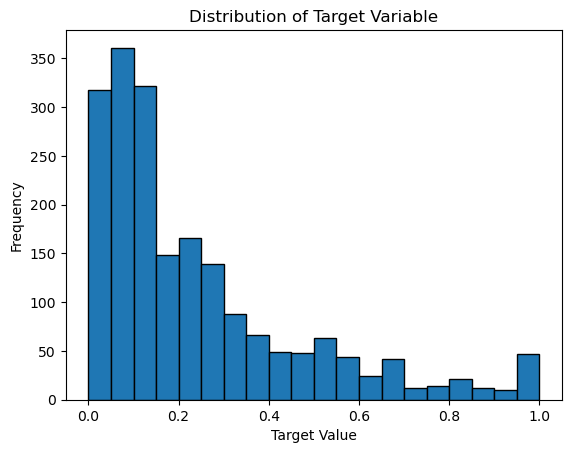

In [259]:
print(f"Target Variable Range: {y.min()} to {y.max()}")

plt.hist(y, bins=20, edgecolor='k')
plt.title("Distribution of Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

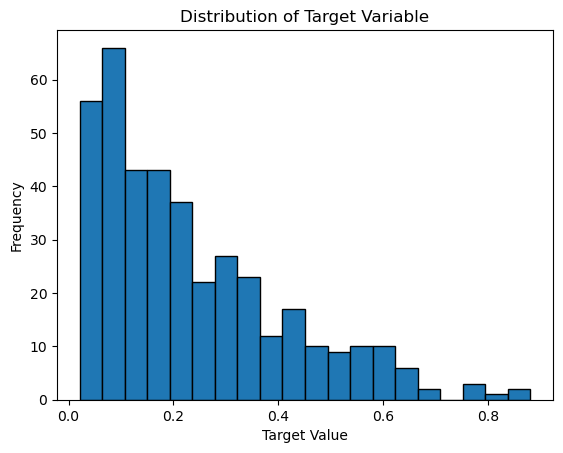

In [260]:
plt.hist(y_pred, bins=20, edgecolor='k')
plt.title("Distribution of Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()